# gender-classification-course-final-project


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install jovian --upgrade --quiet

In [4]:
import jovian


In [5]:
# Execute this to save new versions of the notebook
jovian.commit(project="gender-classification-course-final-project")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/arunkumar68330/gender-classification-course-final-project


'https://jovian.ai/arunkumar68330/gender-classification-course-final-project'

In [6]:
project_name = "gender-classification-course-final-project"

In [7]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.functional as F
from PIL import Image

In [8]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/Resolute_AI/age-gender-and-ethnicity-face-data-csv.zip'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Resolute_AI/age-gender-and-ethnicity-face-data-csv.zip')
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [10]:
len(df.pixels)

23705

In [11]:
X=np.zeros(shape=(23705,2304))

for i in range(len(df.pixels)):
    df.pixels[i]=np.array(df.pixels[i].split(),dtype='float32')
    X[i]=df.pixels[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
X.shape # my image pixels were stored  in this array

(23705, 2304)

In [13]:
X_reshaped=X.reshape(-1,48,48,1)
X_reshaped.shape

(23705, 48, 48, 1)

In [14]:
X_reshaped[0].shape

(48, 48, 1)

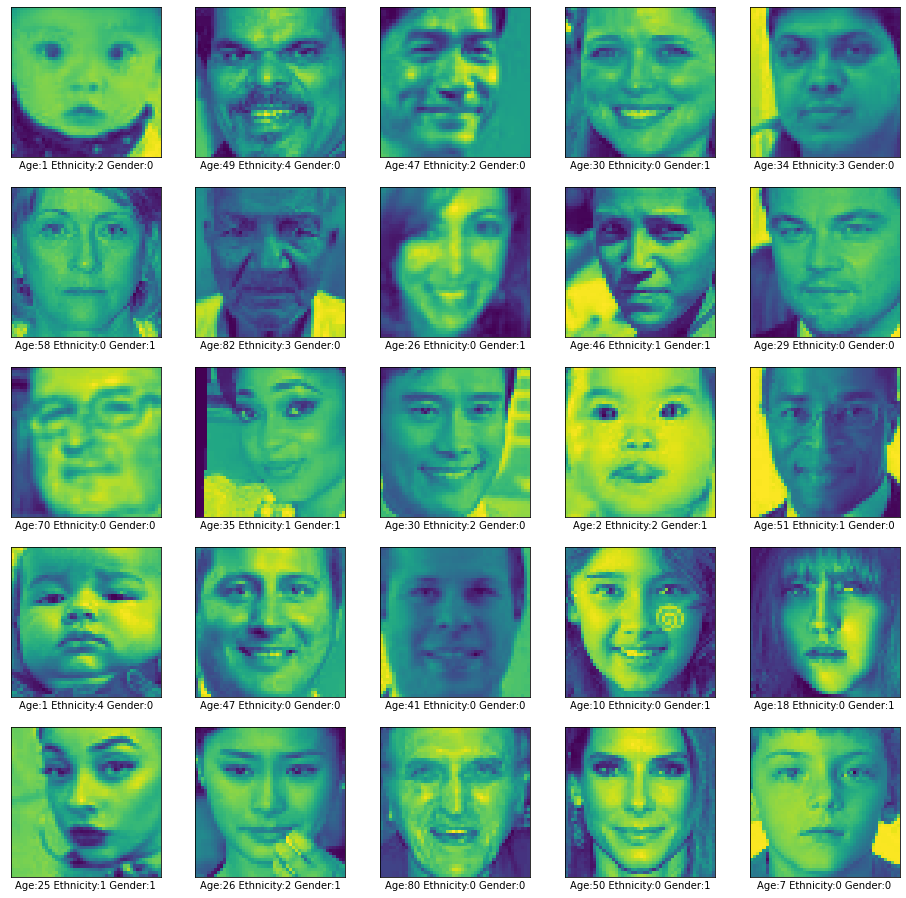

In [15]:
#print random images

index=np.random.randint(0,23704,25)


plt.figure(figsize=(16,16))

for i in range(len(index)):
    plt.subplot(5,5,(i%25)+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_reshaped[index[i]].reshape(48,48))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[index[i]])+
        " Ethnicity:"+str(df['ethnicity'].iloc[index[i]])+
        " Gender:"+str(df['gender'].iloc[index[i]])
    )
    
plt.show()

* Male==0
* Female==1


According to pictures of people(I dont have much idea what this numbers refer to which ethnics)

* 0==White
* 1==Black
* 2==Asian
* 3==İndian
* 4==Latin

Text(0.5, 1.0, 'Age of people according to their gender')

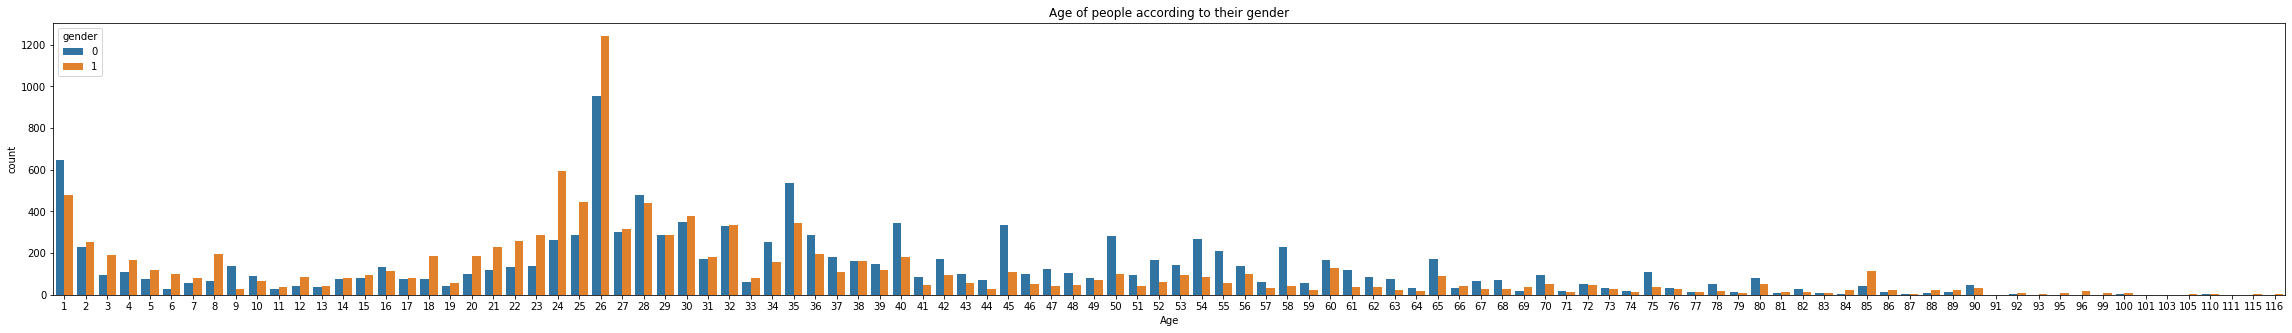

In [16]:
plt.figure(figsize=(40,5))

sns.countplot(x='age',hue='gender',data=df)
plt.xlabel('Age')
plt.title('Age of people according to their gender')

Text(0.5, 1.0, 'Ethnicity of people according to their gender')

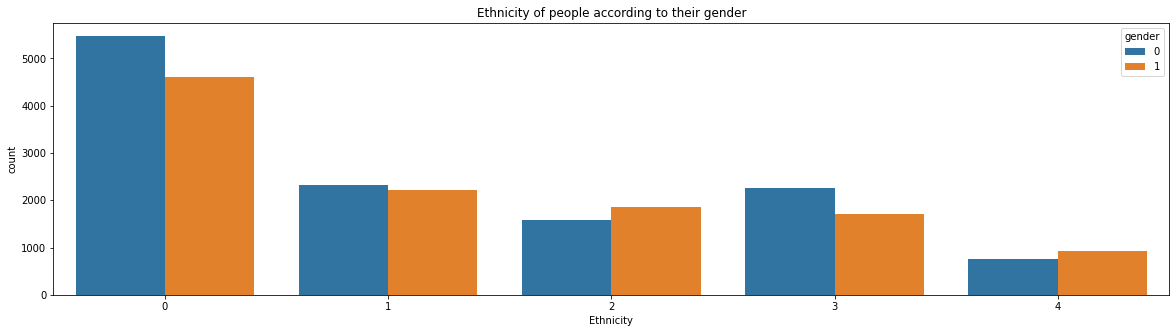

In [17]:
plt.figure(figsize=(20,5))

sns.countplot(x='ethnicity',hue='gender',data=df)
plt.xlabel('Ethnicity')
plt.title('Ethnicity of people according to their gender')

Text(0.5, 1.0, 'Ethnicity of people')

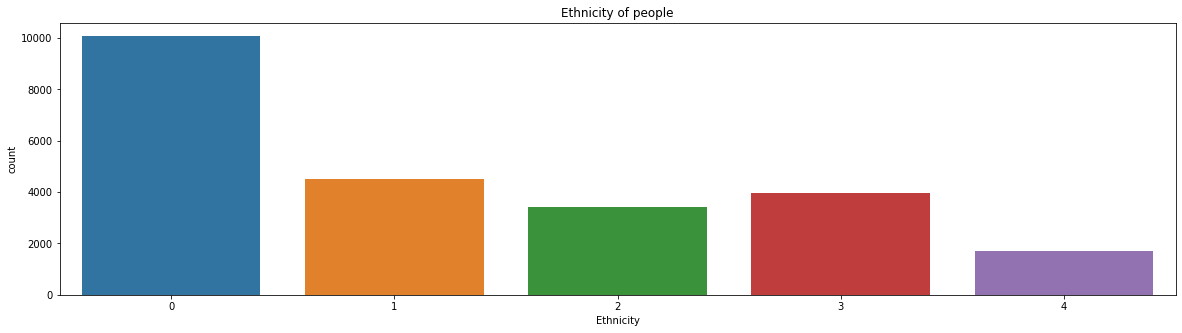

In [18]:
plt.figure(figsize=(20,5))

sns.countplot(x='ethnicity',data=df)
plt.xlabel('Ethnicity')
plt.title('Ethnicity of people') # Unbalanced

Text(0.5, 1.0, 'Age of people')

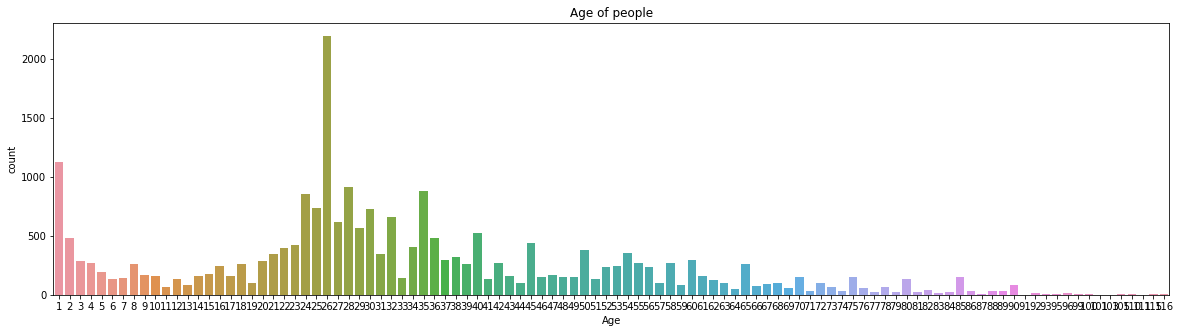

In [19]:
plt.figure(figsize=(20,5))

sns.countplot(x='age',data=df)
plt.xlabel('Age')
plt.title('Age of people') 

Text(0.5, 1.0, 'Gender of people')

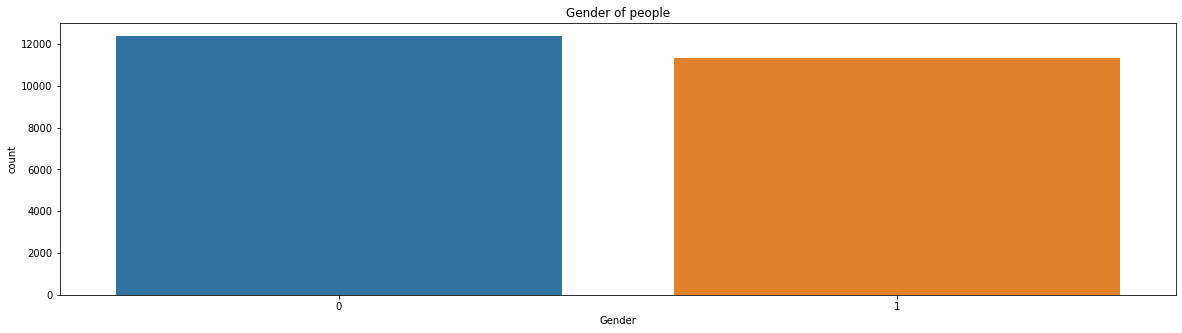

In [20]:
plt.figure(figsize=(20,5))

sns.countplot(x='gender',data=df)
plt.xlabel('Gender')
plt.title('Gender of people') 

In [21]:
df.gender=df.gender.astype('object')
df.ethnicity=df.ethnicity.astype('object')

In [22]:
X.shape #I use this for Pytorch

(23705, 2304)

In [23]:
X_new=X.reshape(23705,1,48,48)


In [24]:
from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()

Y_Gender2=le.fit_transform(df.gender)

In [25]:
Y_Gender2.shape

(23705,)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y_Gender2, test_size=0.3, random_state=42,shuffle=True)
X_test, X_for_pred, y_test, y_for_pred = train_test_split(X_test, y_test, test_size=0.1, random_state=42,shuffle=True)

In [28]:
x_train_tensor=torch.from_numpy(X_train)
print("x_train tensor size:",x_train_tensor.size())

y_train_label=torch.from_numpy(y_train)
print("y_train_label size:",y_train_label.size())

x_train tensor size: torch.Size([16593, 1, 48, 48])
y_train_label size: torch.Size([16593])


In [29]:
x_test_tensor=torch.from_numpy(X_test)
print("x_test tensor size:",x_test_tensor.size())

y_test_label=torch.from_numpy(y_test)
print("y_test_ label size:",y_test_label.size())

x_test tensor size: torch.Size([6400, 1, 48, 48])
y_test_ label size: torch.Size([6400])


In [30]:
x_for_pred_tensor=torch.from_numpy(X_for_pred)
print("x_test tensor size:",x_for_pred_tensor.size())

y_for_pred_label=torch.from_numpy(y_for_pred)
print("y_test_ label size:",y_for_pred_label.size())

x_test tensor size: torch.Size([712, 1, 48, 48])
y_test_ label size: torch.Size([712])


In [31]:
batch_size = 100
n_iters = 200
num_epochs = n_iters / (len(X_test) / batch_size)
num_epochs = int(num_epochs)

In [32]:
num_epochs

3

In [33]:
train=torch.utils.data.TensorDataset(x_train_tensor,y_train_label) # x ve y train birleştirildi
trainloader=torch.utils.data.DataLoader(train,batch_size=batch_size,shuffle=True) # data ya çeviriyoruz eğitime uygun hale geldi

    
test=torch.utils.data.TensorDataset(x_test_tensor,y_test_label) # x ve y train birleştirildi
testloader=torch.utils.data.DataLoader(test,batch_size=batch_size,shuffle=False)

for_pred=torch.utils.data.TensorDataset(x_for_pred_tensor,y_for_pred_label)
for_pred_loader=torch.utils.data.DataLoader(for_pred,batch_size=batch_size,shuffle=False)

In [34]:
jovian.commit(project = project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/arunkumar68330/gender-classification-course-final-project


'https://jovian.ai/arunkumar68330/gender-classification-course-final-project'

# Building Model

In [35]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()

        # Max pool 1
        self.maxpool = nn.MaxPool2d(kernel_size=2)
        
        self.Batch1=nn.BatchNorm2d(16)
        self.Batch2=nn.BatchNorm2d(32)
        self.Batch3=nn.BatchNorm2d(64)
        self.Batch4=nn.BatchNorm2d(128)
        
        self.Drop1=nn.Dropout(0.2)
        self.Drop2=nn.Dropout(0.5)


        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)
        self.cnn3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.cnn4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        
        

        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(128 * 1 * 1, 128) 
        self.fc2=nn.Linear(128,256)
        self.fc3=nn.Linear(256,2)

    def forward(self, x):
 
        out = self.cnn1(x) 
        out = self.relu(out)
        out = self.maxpool(out)
        out=self.Batch1(out)
        out=self.Drop1(out)
 
        out = self.cnn2(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out=self.Batch2(out)
        out=self.Drop1(out)
        
        out = self.cnn3(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out=self.Batch3(out)
        out=self.Drop1(out)
        
        out = self.cnn4(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out=self.Batch4(out)
        out=self.Drop1(out)
        

        # Resize
        # Original size: (100, 32, 7, 7)
        # out.size(0): 100
        # New out size: (100, 32*7*7)
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        
        out=self.Drop2(out)
        
        out=self.fc2(out)
        
        out=self.Drop2(out)
        
        out=self.fc3(out)
        
        

        return out


In [36]:
model = CNNModel()

learning_rate=0.001

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model.parameters())

print(len(list(model.parameters())))

# Convolution 1: 16 Kernels
print(list(model.parameters())[0].size())

# Convolution 1 Bias: 16 Kernels
print(list(model.parameters())[1].size())

# Convolution 2: 32 Kernels with depth = 16
print(list(model.parameters())[2].size())

# Convolution 2 Bias: 32 Kernels with depth = 16
print(list(model.parameters())[3].size())

# Fully Connected Layer 1
print(list(model.parameters())[4].size())

# Fully Connected Layer Bias
print(list(model.parameters())[5].size())

<generator object Module.parameters at 0x7fb982ebaf50>
22
torch.Size([16, 1, 3, 3])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([32])
torch.Size([32])


# Trainning

In [37]:
loss_list=[]
accuracy_list=[]
iter_list=[]

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):
        # Load images
        images = images.requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 10 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in testloader:
                # Load images
                images = images.requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct // total

            # Print Loss
            accuracy_list.append(accuracy)
            loss_list.append(loss.item())
            iter_list.append(iter)
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 10. Loss: 0.7433231472969055. Accuracy: 65
Iteration: 20. Loss: 0.6516385078430176. Accuracy: 68
Iteration: 30. Loss: 0.6269199848175049. Accuracy: 68
Iteration: 40. Loss: 0.5473954081535339. Accuracy: 71
Iteration: 50. Loss: 0.7130976319313049. Accuracy: 72
Iteration: 60. Loss: 0.4829132556915283. Accuracy: 73
Iteration: 70. Loss: 0.602633535861969. Accuracy: 75
Iteration: 80. Loss: 0.6514202356338501. Accuracy: 75
Iteration: 90. Loss: 0.42547497153282166. Accuracy: 76
Iteration: 100. Loss: 0.5200332403182983. Accuracy: 75
Iteration: 110. Loss: 0.5157274603843689. Accuracy: 79
Iteration: 120. Loss: 0.5258488655090332. Accuracy: 79
Iteration: 130. Loss: 0.40049076080322266. Accuracy: 80
Iteration: 140. Loss: 0.5202624201774597. Accuracy: 80
Iteration: 150. Loss: 0.43990159034729004. Accuracy: 81
Iteration: 160. Loss: 0.357560932636261. Accuracy: 80
Iteration: 170. Loss: 0.4640018343925476. Accuracy: 81
Iteration: 180. Loss: 0.3615610897541046. Accuracy: 81
Iteration: 190. Lo

<Figure size 432x288 with 0 Axes>

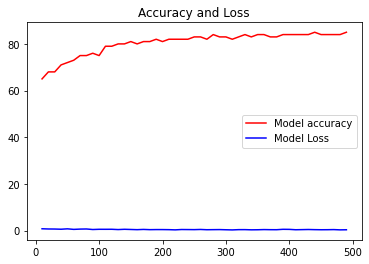

<Figure size 432x288 with 0 Axes>

In [38]:
%matplotlib inline
acc = accuracy_list
loss = loss_list
iteration=iter_list

plt.plot(iteration, acc, 'r', label='Model accuracy')
plt.plot(iteration, loss, 'b', label='Model Loss')
plt.title('Accuracy and Loss')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

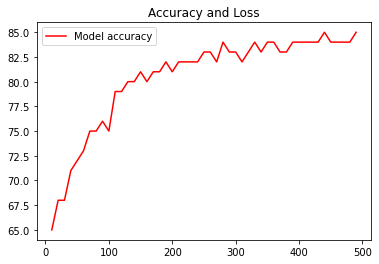

<Figure size 432x288 with 0 Axes>

In [39]:
plt.plot(iteration, acc, 'r', label='Model accuracy')
#plt.plot(iteration, loss, 'b', label='Model Loss')
plt.title('Accuracy and Loss')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

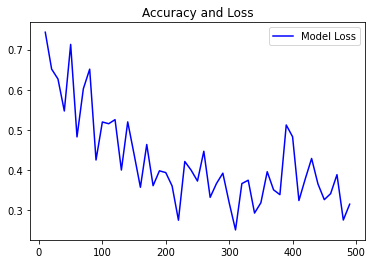

<Figure size 432x288 with 0 Axes>

In [40]:
#plt.plot(iteration, acc, 'r', label='Model accuracy')
plt.plot(iteration, loss, 'b', label='Model Loss')
plt.title('Accuracy and Loss')
plt.legend()
plt.figure()

In [43]:
jovian.commit(project="project_name")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/arunkumar68330/project-name


'https://jovian.ai/arunkumar68330/project-name'